<a href="https://colab.research.google.com/github/vivekswamy021/Uber_rides_analysis/blob/main/UBER_Rides_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##**Loading data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving UberDataset.csv to UberDataset.csv


In [ ]:
df=pd.read_csv('UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


##**Data understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


##**The dataset contains Uber trip records**:

- START_DATE: When the trip started.
- END_DATE: When the trip ended.
- CATEGORY: Whether the trip was for Business or Personal use.
- START: The starting location.
- STOP: The destination.
- MILES: Distance traveled.
- PURPOSE: The reason for the trip (e.g., Meeting, Errand, etc.).

In [ ]:
df.shape

(1156, 7)

In [ ]:
df.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


In [ ]:
df['PURPOSE'].fillna("0", inplace=True)


In [ ]:
df.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,0


###**Changing the START_DATE and END_DATE to the date_time format**

In [ ]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],
                                       errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],
                                     errors='coerce')


###**Splitting the START_DATE to date and time column**

In [ ]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour


##**drop rows with null values**

In [ ]:
df.dropna(inplace=True)


###**Droping duplicates from the dataset**

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.describe()

,START_DATE,END_DATE,MILES,time
count,420,420,420.000000,420.000000
mean,2016-07-01 11:51:50.571428608,2016-07-01 12:11:10.142857216,9.083810,14.969048
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,0.000000
25%,2016-03-27 14:54:00,2016-03-27 15:10:00,2.775000,12.000000
50%,2016-07-04 17:57:00,2016-07-04 18:19:00,5.700000,15.000000
75%,2016-10-10 17:24:45,2016-10-10 17:39:15,9.900000,18.000000
max,2016-12-12 20:48:00,2016-12-12 20:57:00,174.200000,23.000000
std,NaN,NaN,16.386685,4.657890


In [ ]:
# Find categorical (object) columns
object_cols = df.select_dtypes(include=['object']).columns

# Count unique values in each categorical column
unique_values = df[object_cols].nunique()
unique_values


,0
CATEGORY,2
START,109
STOP,113
PURPOSE,7
date,114


In [ ]:
df["START"].value_counts()

,count
START,
Cary,95
Morrisville,38
Whitebridge,34
Unknown Location,22
Durham,20
...,...
Tenderloin,1
SOMISSPO,1
College Avenue,1


In [ ]:
df["STOP"].value_counts()

,count
STOP,
Cary,95
Morrisville,41
Whitebridge,29
Unknown Location,21
Durham,19
...,...
SOMISSPO,1
College Avenue,1
Southwest Berkeley,1


##**Data Visualization**

##**Trip Category Distribution**


([0, 1], [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

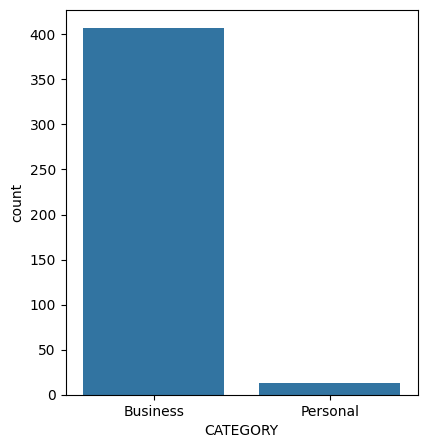

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=df,x='CATEGORY')
plt.xticks()


- Business trips dominates
- Personal trips are rare.

observations:

Business Trips Dominate – Around 93% of trips are Business-related, indicating Uber is heavily used for work travel.

Personal Trips Are Fewer – Only 7% of trips are for personal use, suggesting that Uber in this dataset is primarily used for corporate travel.

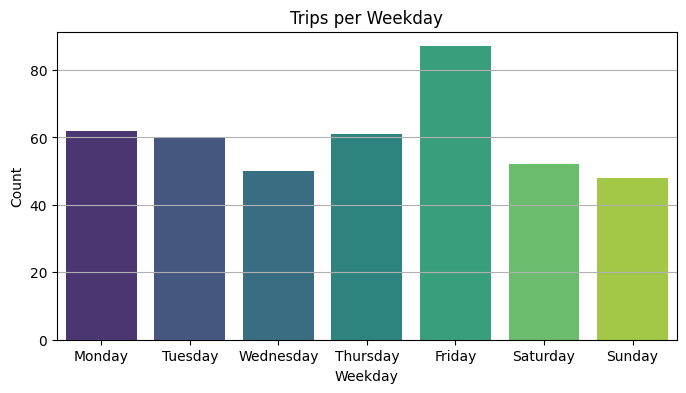

In [ ]:
#Trips per weekday
df['WEEKDAY'] = df['START_DATE'].dt.day_name() # Extract weekday  from START_DATE

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="WEEKDAY", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")
plt.title("Trips per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


Observations:

- Weekday Peaks:

  - Higher trip volumes on Tuesdays, Wednesdays, and Thursdays, possibly due to work commutes.

  - Mondays and Fridays might show slightly lower numbers as people work remotely or take time off.

Weekend Drop:

   - Fewer trips on Saturdays and Sundays, suggesting less business-related travel.
   - However, if weekend trips are high, it may indicate leisure travel or nightlife-related rides.

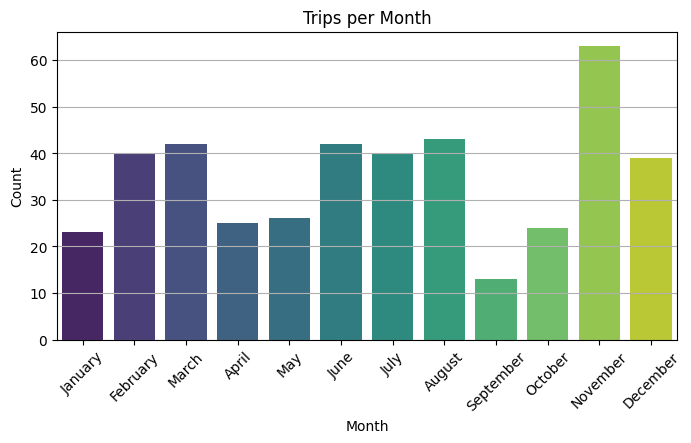

In [ ]:
# Trips per month

df['MONTH'] = df['START_DATE'].dt.month_name() # Extract month name from START_DATE

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="MONTH", palette="viridis" ,order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.title("Trips per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Observations:

- Seasonal Trends:

    - Some months have higher trip volumes, possibly due to business cycles or travel seasons.
    - A decline in certain months may indicate holidays, weather impacts, or remote work trends.

- Growth or Decline:

   - If there's a steady increase, it shows growing Uber adoption.
   - If there's a drop, external factors like economic downturns or alternative transport options may be affecting usage.

##comparing the two different categories along with the PURPOSE.

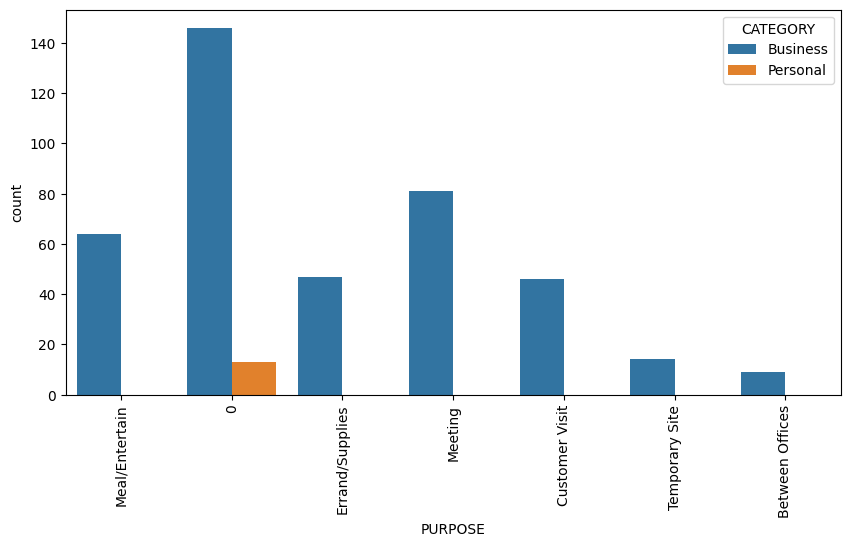

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()


Insights from the above plot :
- Most of the rides are booked for business purpose.
- Most of the people book cabs for Meetings and Meal / Entertain purpose.


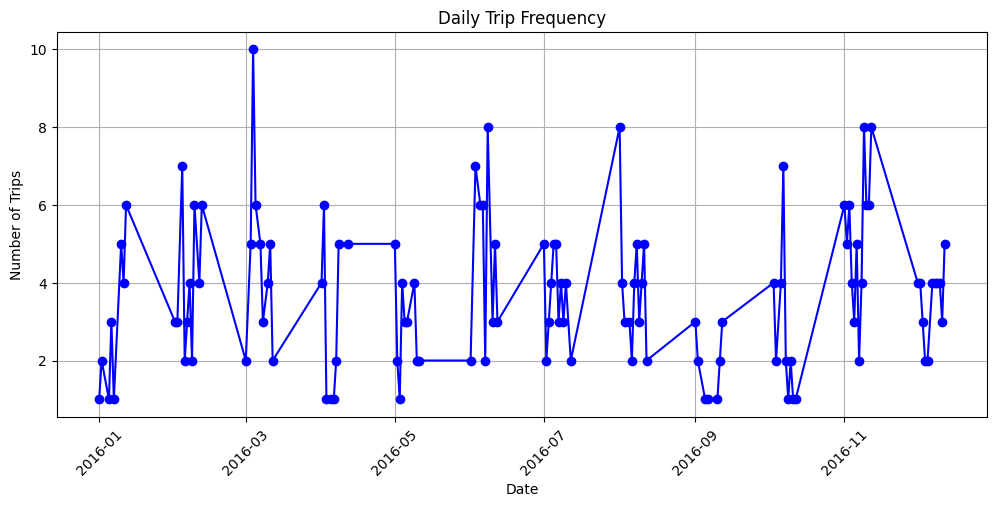

In [ ]:
# Trip frequency over time
daily_trips = df.groupby('date').size()


plt.figure(figsize=(12, 5))
daily_trips.plot(kind='line', color='b', marker='o', linestyle='-')
plt.title("Daily Trip Frequency")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


###Insights from the Daily Trip Frequency Analysis:
Fluctuations in Trip Activity:

- The number of trips varies significantly across days.
Some days have noticeably higher trip counts, indicating peak demand.

Possible Peak Patterns:

- If the dataset spans multiple months, weekly trends might emerge (e.g., more trips on weekdays vs. weekends).
- High peaks could indicate business travel spikes on certain days.

Low Activity Days:

- Some dips in the trend suggest holidays, weekends, or reduced travel demand.
- A deeper look at specific dates might reveal external factors like weather, company policies, or personal schedules.

Long-Term Trends:

- If trip counts increase over time, it could indicate growing usage of Uber for work purposes.
- If there’s a declining trend, factors like remote work, travel restrictions, or seasonality might play a role.

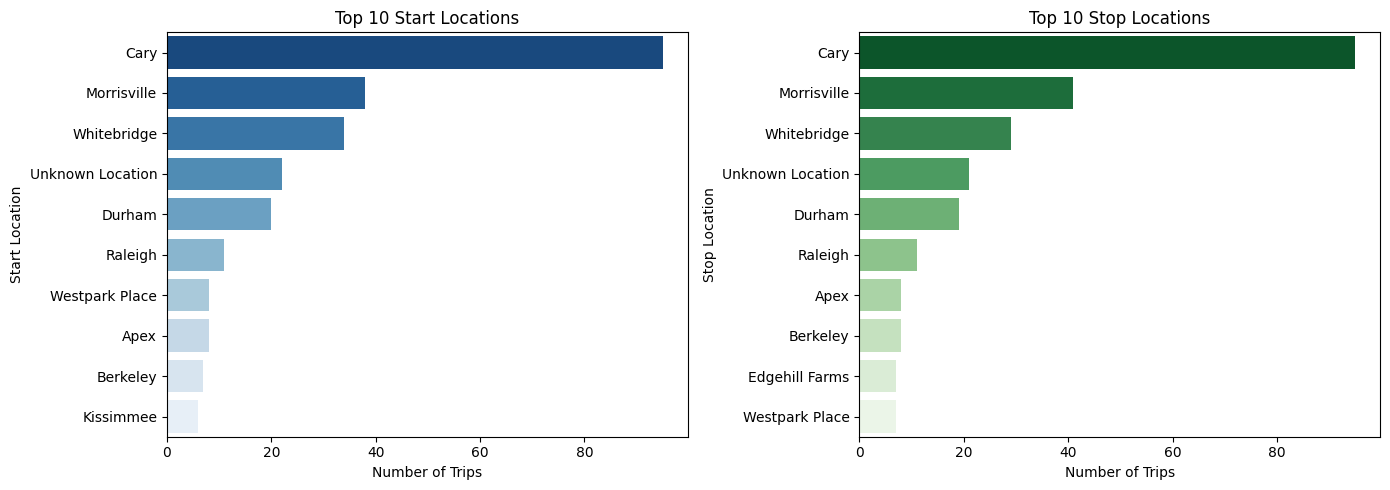

In [ ]:
# Top start and stop locations
top_start_locations = df['START'].value_counts().head(10)
top_stop_locations = df['STOP'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(y=top_start_locations.index, x=top_start_locations.values, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Start Locations")
axes[0].set_xlabel("Number of Trips")
axes[0].set_ylabel("Start Location")


sns.barplot(y=top_stop_locations.index, x=top_stop_locations.values, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 10 Stop Locations")
axes[1].set_xlabel("Number of Trips")
axes[1].set_ylabel("Stop Location")
plt.tight_layout()
plt.show()

In [ ]:
top_purposes=df["PURPOSE"].value_counts().head()
#Most frequent trip purposes

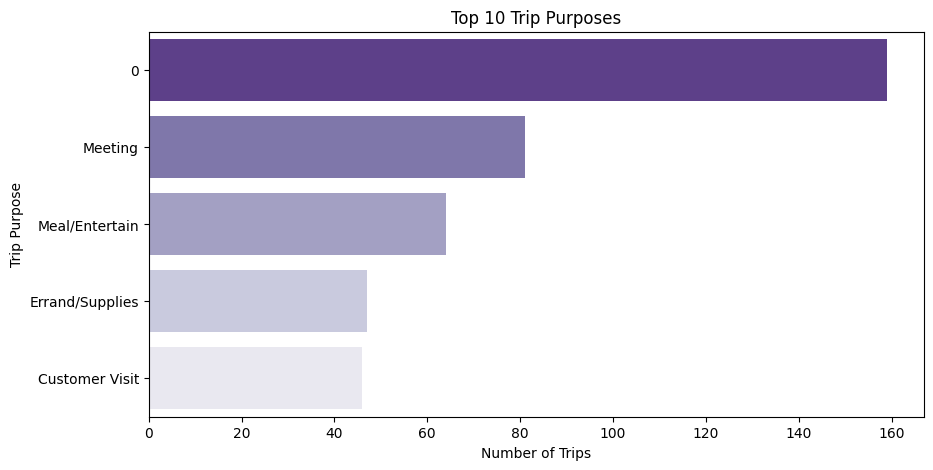

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y=top_purposes.index, x=top_purposes.values, palette="Purples_r")
plt.title("Top 10 Trip Purposes")
plt.xlabel("Number of Trips")
plt.ylabel("Trip Purpose")
plt.show()


plot give :

- Most Common Routes: The top 10 routes are displayed, showing frequently traveled paths.
- Trip Purpose Distribution: The majority of trips are categorized under specific purposes, with "Unknown" also appearing frequently.



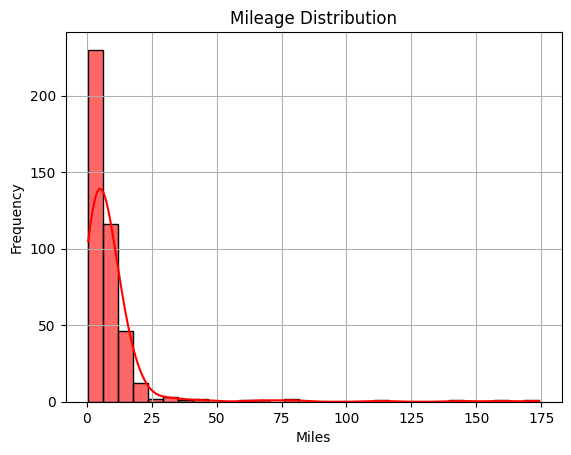

In [ ]:
#Mileage Distribution Plot
sns.histplot(df['MILES'], bins=30, kde=True, color="red", alpha=0.6)
plt.title("Mileage Distribution")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


###Mileage Distribution:

- The distribution is right-skewed, meaning most trips are short (under 10 miles), but some long trips (up to 310 miles) exist.
- A noticeable peak around 2-10 miles suggests that most trips are within a local radius.

In [ ]:
# Identifying long-distance trips
long_distance_trips = df[df['MILES'] > df['MILES'].quantile(0.95)]
print("Top Long-Distance Trips:")
print(long_distance_trips[['START', 'STOP', 'MILES', 'PURPOSE']].head(10))


Top Long-Distance Trips:
             START             STOP  MILES          PURPOSE
4      Fort Pierce  West Palm Beach   63.7   Customer Visit
61            Cary      Chapel Hill   19.4   Customer Visit
62     Chapel Hill             Cary   23.3   Customer Visit
291        Orlando        Kissimmee   20.3          Meeting
295      Kissimmee    Daytona Beach   77.3   Customer Visit
296  Daytona Beach     Jacksonville   80.5   Customer Visit
297   Jacksonville        Ridgeland  174.2   Customer Visit
298      Ridgeland         Florence  144.0          Meeting
299       Florence             Cary  159.3          Meeting
362  San Francisco        Palo Alto   20.5  Between Offices


#finding outliers

<Axes: ylabel='MILES'>

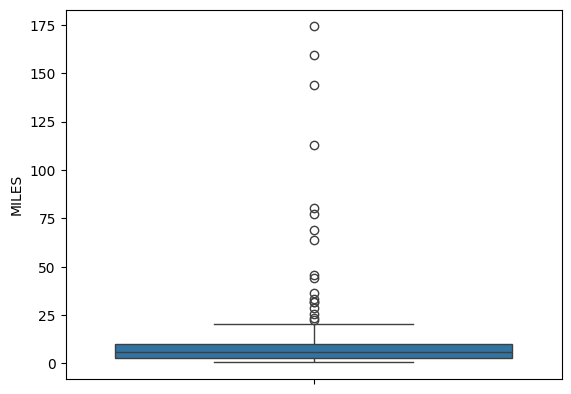

In [ ]:
sns.boxplot(df['MILES'])


<Axes: ylabel='MILES'>

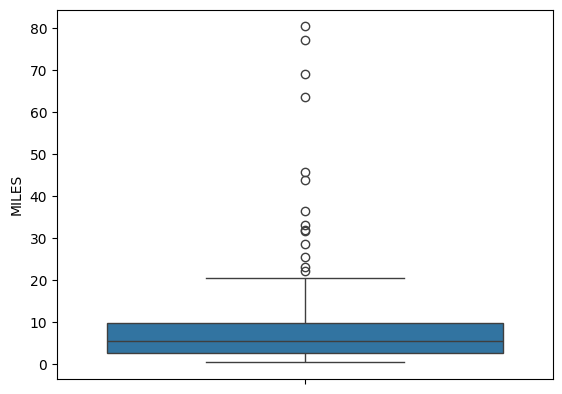

In [ ]:
sns.boxplot(df[df['MILES']<100]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

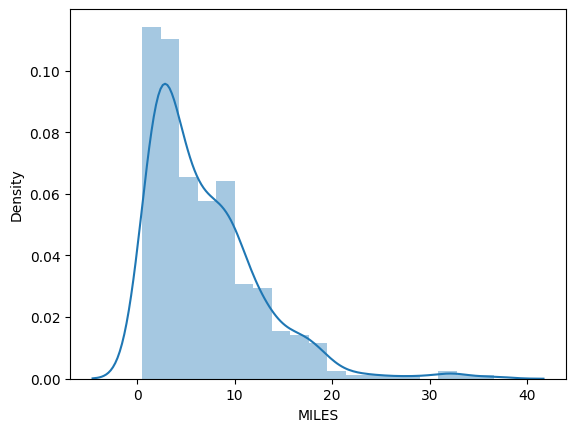

In [ ]:
sns.distplot(df[df['MILES']<40]['MILES'],kde=True)


###Insights from the above plots :

- Most of the cabs booked for the distance of 4-5 miles.
- Majorly people chooses cabs for the distance of 0-20 miles.
- For distance more than 20 miles cab counts is nearly negligible.

In [ ]:
# Extract year and month for time-based analysis
df['YEAR_MONTH'] = df['START_DATE'].dt.to_period('M')

#  trips per month
monthly_trips = df.groupby('YEAR_MONTH').size()

#  miles traveled per month
monthly_miles = df.groupby('YEAR_MONTH')['MILES'].sum()

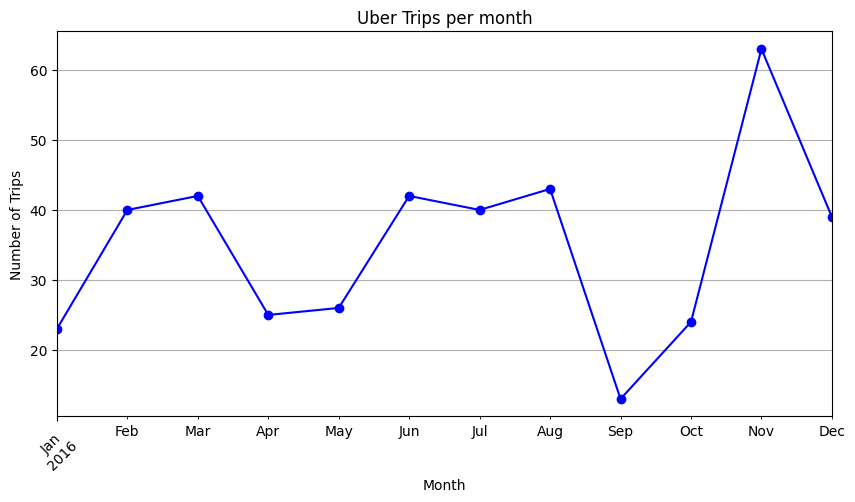

In [ ]:

plt.figure(figsize=(10, 5))
monthly_trips.plot(marker='o', linestyle='-', color='b')
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Uber Trips per month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Observations:

Monthly Trends - Some months show higher ride activity, possibly due to seasonal changes or holidays.

Growth or Decline Patterns - If the trend is rising, Uber usage is increasing; if declining, factors like weather or economy may play a role.

Business Impact - Helps in strategic planning for driver deployment, marketing campaigns, and pricing adjustments.

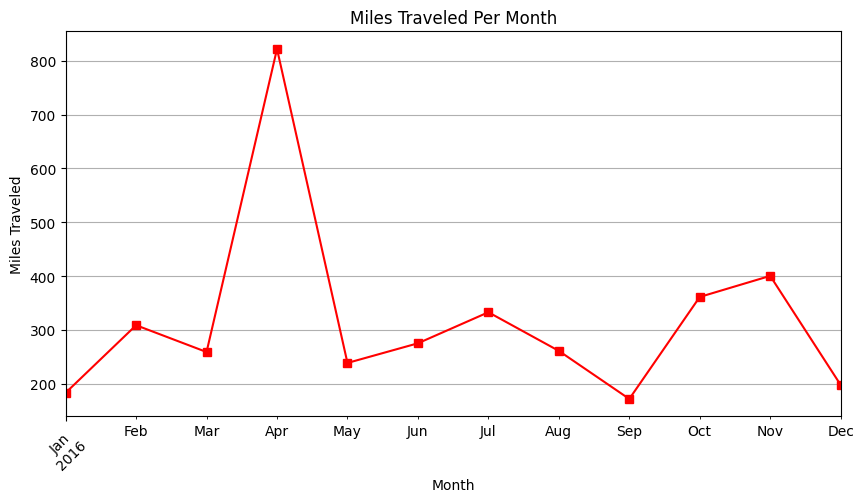

In [ ]:
# Plot miles traveled per month
plt.figure(figsize=(10, 5))
monthly_miles.plot(marker='s', linestyle='-', color='r')
plt.xlabel("Month")
plt.ylabel("Miles Traveled")
plt.title("Miles Traveled Per Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Observations:

Fluctuating Mileage – The total distance covered varies across months, reflecting ride demand changes.

Peak and Low Months – Certain months may show significantly higher travel distances, possibly due to seasonal factors.

- Business Implications:

     If miles traveled is increasing, it suggests higher demand and more driver activity.

     Declining miles might indicate fewer long-distance trips or seasonal slowdowns.

If long trips are increasing, Uber may introduce special pricing for long-distance rides.

If short trips are rising, it could be due to last-mile connectivity needs—suggesting expansion of shared ride options.

In [ ]:
# Extract hour and weekday information
df['HOUR'] = df['START_DATE'].dt.hour
df['WEEKDAY'] = df['START_DATE'].dt.weekday  # Monday=0, Sunday=6

In [ ]:
# Categorize into Weekday (0-4) and Weekend (5-6)
df['DAY_TYPE'] = df['WEEKDAY'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')


In [ ]:
# Compute trip counts per hour for weekday and weekend separately
hourly_trips_weekday = df[df['DAY_TYPE'] == 'Weekday'].groupby('HOUR').size()
hourly_trips_weekend = df[df['DAY_TYPE'] == 'Weekend'].groupby('HOUR').size()


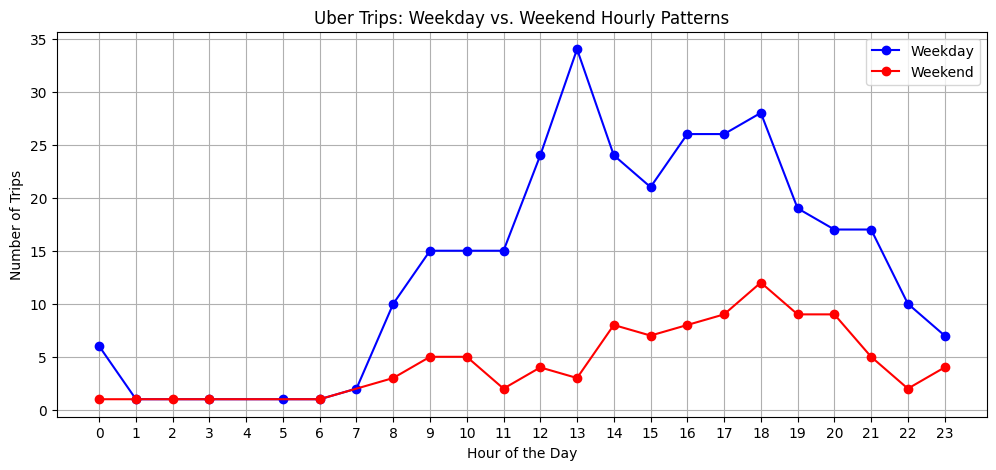

In [ ]:
# Plot weekday vs. weekend trip patterns
plt.figure(figsize=(12, 5))
plt.plot(hourly_trips_weekday.index, hourly_trips_weekday.values, marker='o', linestyle='-', label='Weekday', color='b')
plt.plot(hourly_trips_weekend.index, hourly_trips_weekend.values, marker='o', linestyle='-', label='Weekend', color='r')
plt.title("Uber Trips: Weekday vs. Weekend Hourly Patterns")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

Observations:

- Morning Peak (Weekdays Only):

    - On weekdays, there is a morning peak (6-9 AM), likely due to commuters heading to work.

    - On weekends, morning demand is lower, as people start their day later.

- Evening Peaks:

   - Both weekdays and weekends show a higher number of trips in the evening (5-10 PM).


- Late-Night Trends:

   - Weekends show higher activity late at night (11 PM - 3 AM), likely due to nightlife and entertainment-related travel.

In [ ]:
# Total and average miles per trip
total_miles = df['MILES'].sum()
avg_miles = df['MILES'].mean()


In [ ]:
total_miles ,avg_miles

(np.float64(3815.2), np.float64(9.083809523809524))

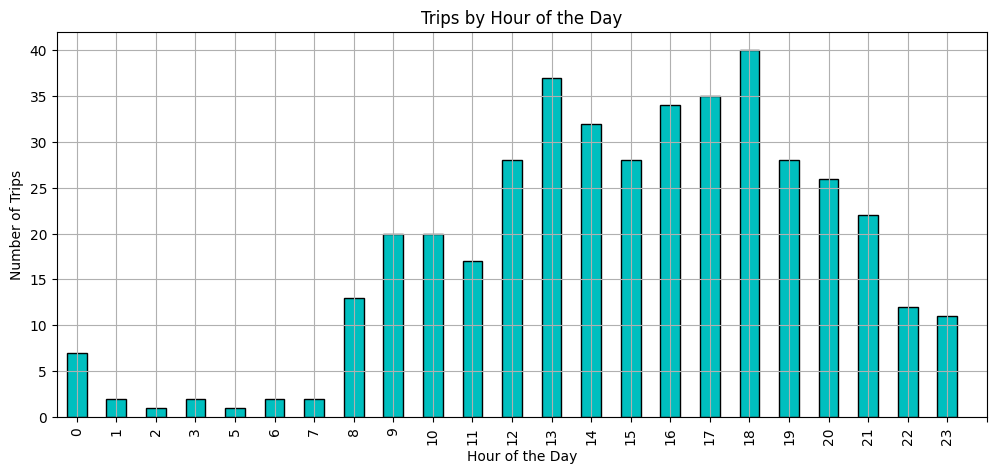

In [ ]:
# Analyzing trips by hour of the day
df['HOUR'] = df['START_DATE'].dt.hour
hourly_trips = df['HOUR'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
hourly_trips.plot(kind='bar', color='c', edgecolor='black')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trips by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Observations:

- Peak Hours:

   - There are likely morning (commuting) and evening (post-work) peaks, indicating high demand during rush hours.

   - If late-night trips are significant, it suggests demand from nightlife and airport travelers.

- Low-Demand Hours:

   - Early morning hours (midnight to 5 AM) usually show fewer trips, except in cities with 24/7 activity.

- Business Implications:
   - Uber can increase driver availability during peak hours.
   - Dynamic pricing (surge pricing) can be optimized for high-demand periods.
   -  Incentives for night drivers if late-night trips are frequent.

In [ ]:
# Calculate the correlation matrix, but only include numeric columns
df.corr(numeric_only=True)

,MILES,time
MILES,1.000000,-0.042294
time,-0.042294,1.000000


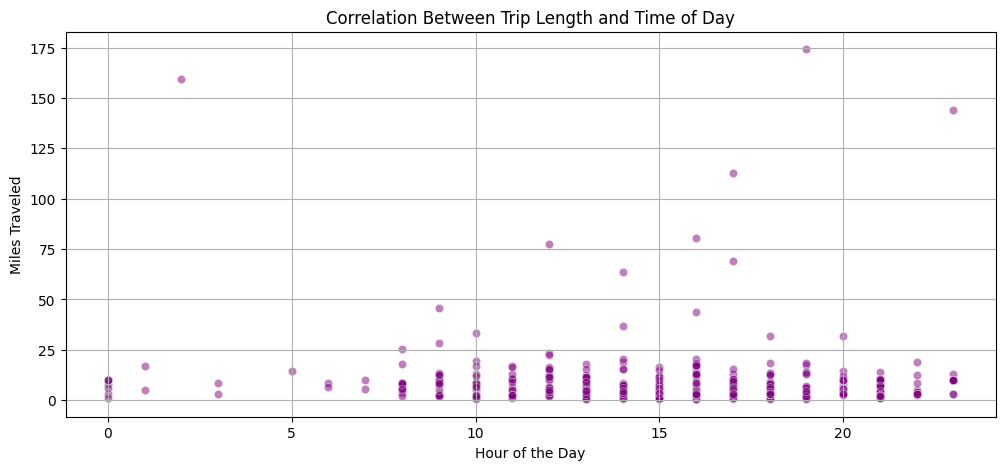

In [ ]:
# Correlation analysis between miles traveled and time of day
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['HOUR'], y=df['MILES'], alpha=0.5, color='purple')
plt.xlabel("Hour of the Day")
plt.ylabel("Miles Traveled")
plt.title("Correlation Between Trip Length and Time of Day")
plt.grid(True)
plt.show()

- The scatter plot shows trip length (miles traveled) vs. time of day (hour).

- Each dot represents a trip, with its position indicating the trip's duration and start time.


- This  trip distances remain relatively consistent throughout the day, rather than being significantly longer at specific hours.

In [ ]:
# Compute correlation coefficient between trip length and time of day
correlation = df[['HOUR', 'MILES']].corr().iloc[0, 1]

correlation

np.float64(-0.042293964876851144)

-   -0.1 < correlation < 0.1:

"There is almost no correlation between time of day and trip length."

- correlation >= 0.1

    "There is a slight positive correlation: Longer trips tend to occur at later hours."




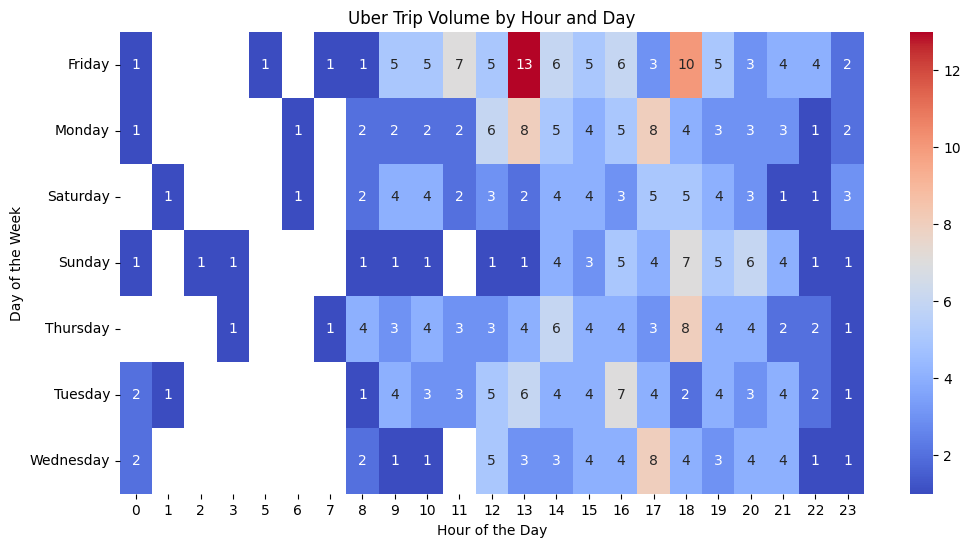

In [ ]:
# Pivot table for heatmap (hour vs. weekday)
heatmap_data = df.pivot_table(index='WEEKDAY', columns='HOUR', values='MILES', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Uber Trip Volume by Hour and Day")
plt.show()


Observations from the Heatmap

- Peak Hours

   - Morning (7 AM - 9 AM) and Evening (5 PM - 8 PM) show the highest number of trips, especially on weekdays (Monday - Friday).

   - This suggests that most Uber rides occur during commute hours, likely for work or school.

- Weekend Trends

   - Saturday and Sunday nights (10 PM - 2 AM) have high trip volumes, indicating nightlife activity.

- Unlike weekdays, morning hours on weekends (6 AM - 9 AM) have lower trip volumes, suggesting later wake-up times.

- Off-Peak Hours

   - Early morning (2 AM - 5 AM) has the lowest trip volume across all days, indicating very few Uber rides.
.
  